In [2]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker

import rasterio as rio
import cartopy.crs as ccrs
import geopandas as gpd

In [3]:
gdf = gpd.read_file('data\Boston_ev.shp')
tif_path = "data\Evening_Area-wide_Temperature_Boston.tif"

print(gdf)

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\esl26\AppData\Local\Temp\ipykernel_29068\3833186397.py:1: SyntaxWarning: invalid escape sequence '\B'
  gdf = gpd.read_file('data\Boston_ev.shp')
C:\Users\esl26\AppData\Local\Temp\ipykernel_29068\3833186397.py:2: SyntaxWarning: invalid escape sequence '\E'
  tif_path = "data\Evening_Area-wide_Temperature_Boston.tif"


             lat       long    time_n  speed   T_C    RH    T_F  case  \
0      42.284805 -71.064607  230004.0  15.10  29.9  58.7  85.82     2   
1      42.284842 -71.064572  230005.0  21.43  29.9  58.7  85.82     2   
2      42.284887 -71.064543  230006.0  22.94  29.9  58.7  85.82     2   
3      42.284937 -71.064522  230007.0  22.81  29.9  58.8  85.82     2   
4      42.284987 -71.064503  230008.0  22.81  29.9  58.8  85.82     2   
...          ...        ...       ...    ...   ...   ...    ...   ...   
20242  42.325347 -71.120802  234015.0  26.22  28.6  64.7  83.48     2   
20243  42.325293 -71.120838  234016.0  26.22  28.6  64.8  83.48     2   
20244  42.325252 -71.120880  234017.0  18.06  28.6  64.8  83.48     2   
20245  42.325222 -71.120920  234018.0  13.87  28.6  64.9  83.48     2   
20246  42.325195 -71.120950  234019.0   9.76  28.6  64.9  83.48     2   

            HI_F       HI_C                    geometry  
0      90.307220  32.392900  POINT (-71.06461 42.28480)  
1      

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


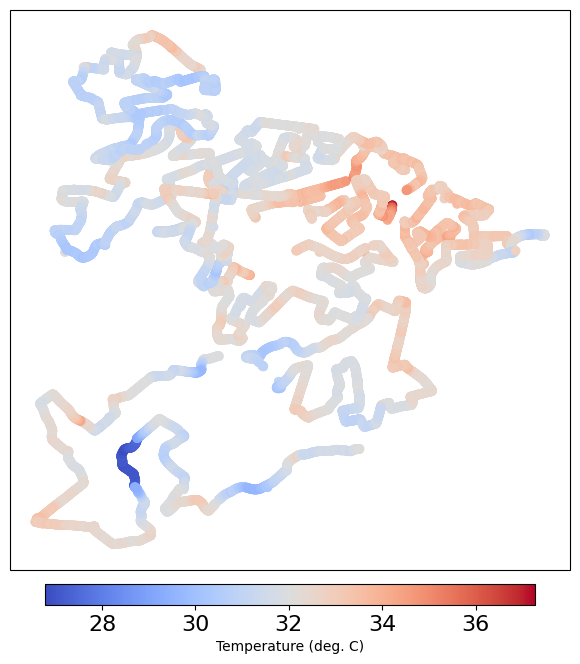

In [4]:
# Load the raster data from the Tiff file
with rio.open(tif_path) as src:
    raster_data = src.read(1)  # Assuming a single-band raster

# Create figure and axes
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='--',
                    ylabel_style={'size': 16, 'rotation': 'vertical'},
                    xlabel_style={'size': 16})

# Set fixed locator values for gridlines
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.06, -71.095, -71.13])
gl.ylocator = mticker.FixedLocator([42.28, 42.31, 42.34])

# Scatter plot temperature against location
sc = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['HI_C'], cmap='coolwarm')

# Colorbar axes
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])

# Add colorbar
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_xlabel('Temperature (deg. C)')

# Show the plot
plt.show()

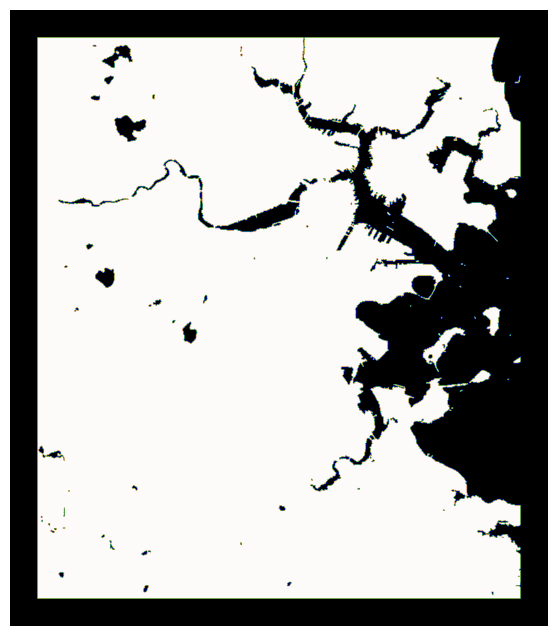

In [5]:
fig = plt.figure(figsize=(8,8))
img_extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
plt.imshow(raster_data, cmap='gist_earth', origin='upper', alpha=1)
plt.axis('off')
plt.show()

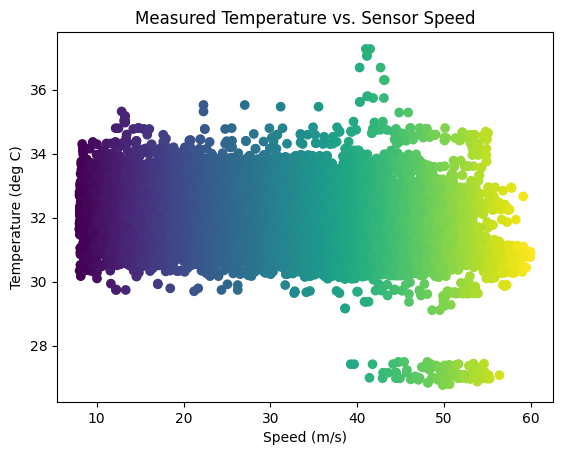

In [6]:
# Plot temperature against speed of sensor at the time of measurement
x = gdf['speed']
y = gdf['HI_C']
plt.scatter(x,y, c=x, cmap='viridis', marker = 'o')
plt.title('Measured Temperature vs. Sensor Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Temperature (deg C)')
plt.show()

In [31]:
with rio.open('data/boston_rgb.tif') as src:
    rgb = src.read()

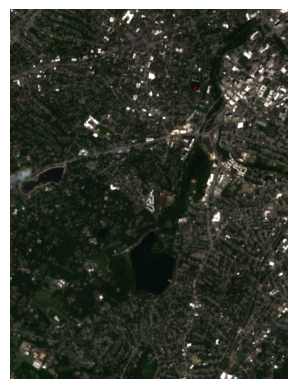

In [58]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the TIFF file
tif_path = 'data/boston_rgb.tif'  # Replace with the actual path to your TIFF file
image = Image.open(tif_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()